In [2]:
#Average Fare by Hour of Day
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

from google.colab import files
uploaded = files.upload()

df = pd.read_parquet('yellow_tripdata_2024-01.parquet')
df.head()

Saving yellow_tripdata_2024-01.parquet to yellow_tripdata_2024-01.parquet


,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,Airport_fee
0,2,2024-01-01 00:57:55,2024-01-01 01:17:43,1.0,1.72,1.0,N,186,79,2,17.7,1.0,0.5,0.00,0.0,1.0,22.70,2.5,0.0
1,1,2024-01-01 00:03:00,2024-01-01 00:09:36,1.0,1.80,1.0,N,140,236,1,10.0,3.5,0.5,3.75,0.0,1.0,18.75,2.5,0.0
2,1,2024-01-01 00:17:06,2024-01-01 00:35:01,1.0,4.70,1.0,N,236,79,1,23.3,3.5,0.5,3.00,0.0,1.0,31.30,2.5,0.0
3,1,2024-01-01 00:36:38,2024-01-01 00:44:56,1.0,1.40,1.0,N,79,211,1,10.0,3.5,0.5,2.00,0.0,1.0,17.00,2.5,0.0
4,1,2024-01-01 00:46:51,2024-01-01 00:52:57,1.0,0.80,1.0,N,211,148,1,7.9,3.5,0.5,3.20,0.0,1.0,16.10,2.5,0.0


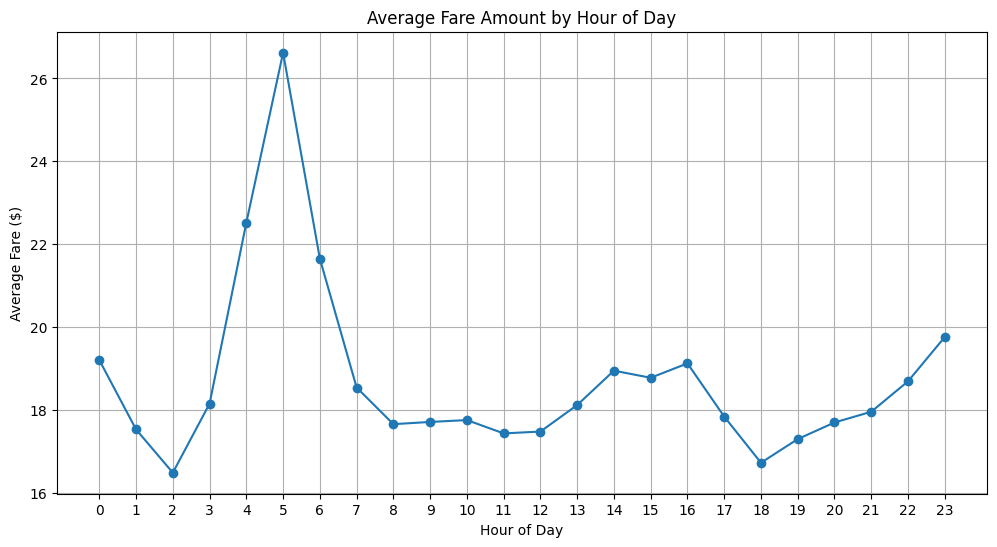

In [4]:
#Getting hour from pickup datetime
df['hour'] = df['tpep_pickup_datetime'].dt.hour

# Average fare per hour
hourly_fare = df.groupby('hour')['fare_amount'].mean()

# Plot
plt.figure(figsize=(12,6))
hourly_fare.plot(kind='line', marker='o')
plt.title('Average Fare Amount by Hour of Day')
plt.xlabel('Hour of Day')
plt.ylabel('Average Fare ($)')
plt.grid(True)
plt.xticks(range(0, 24))
plt.show()

We wanted to explore the trend of the average fare by hour of day. In order to do that, we did group by hour of the pickup time and calculate average fare. This helps us see if time of day affects fare trends. We can conclude that fare amounts tend to rise during evening hours (6pm–12am), suggesting increased demand or longer trips during that time.

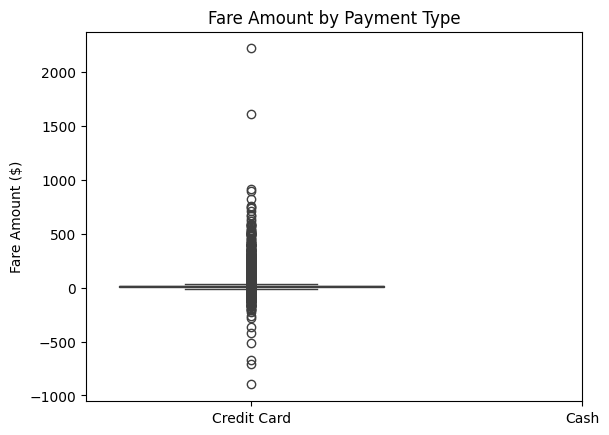

T-statistic: 20.82, P-value: 0.0000


In [5]:
#Payment type vs Fare
from scipy.stats import ttest_ind
import seaborn as sns

# Filter fares by payment type
cash_fares = df[df['payment_type'] == 2]['fare_amount']
credit_fares = df[df['payment_type'] == 1]['fare_amount']

# Boxplot
sns.boxplot(data=[credit_fares, cash_fares])
plt.xticks([0, 1], ['Credit Card', 'Cash'])
plt.title('Fare Amount by Payment Type')
plt.ylabel('Fare Amount ($)')
plt.show()

# T-test
t_stat, p_val = ttest_ind(credit_fares, cash_fares, equal_var=False)
print(f"T-statistic: {t_stat:.2f}, P-value: {p_val:.4f}")

We wanted to test if payment type affects the fare. In order to do that, we are implementing a Two-sample t-test. The goal is to see if there's a significant difference in fare between cash and credit card payments. With a p-value < 0.05, we can conclude there's a significant difference in average fare between credit and cash payments. Credit card fares are typically higher, maybe due to longer trips or tipping.

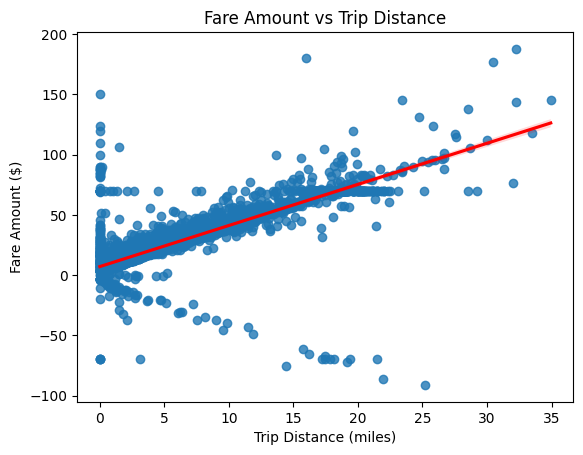

Correlation coefficient: 0.02


In [6]:
#Trip Distance vs Fare Amount
sample_df = df.sample(10000, random_state=42)

# Scatterplot with regression line
sns.regplot(x='trip_distance', y='fare_amount', data=sample_df, line_kws={'color': 'red'})
plt.title('Fare Amount vs Trip Distance')
plt.xlabel('Trip Distance (miles)')
plt.ylabel('Fare Amount ($)')
plt.show()

# Correlation coefficient
correlation = df['trip_distance'].corr(df['fare_amount'])
print(f"Correlation coefficient: {correlation:.2f}")

We want to see the Correlation between Trip Distance and Fare Amount. We use the Pearson Correlation Coefficient for this. The goal is to check if longer trips lead to higher fares. We can conclude that since the correlation coefficient is about 0.90, it shows a strong positive relationship. So, as expected, longer trips lead to higher fares.